In [1]:
using DataFrames
using CSV
using Plots
using LaTeXStrings
using StatsPlots

In [2]:
pyplot()
theme(:default)

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


In [6]:
function plot_time(dn, num_idx, dg)
    runs = []
    ts = []
    num_ps = []
    num_cs = []
    rhos = []
    t = 0
    r = 0
    rho = ""
    num_c = 0
    num_p = 0
    for r in ["0.0", "0.0001", "0.001", "0.01", "0.1", "1.0"], index in 1:num_idx 
        open("../logs/num_node_analysis/$(dn)_$(r)_srvi/log_$index.txt", "r") do io
#         open("../logs/num_node_analysis/$(dn)_$(r)_rvi/log_$index.txt", "r") do io
            for (num, line) in enumerate(eachline(io))
                if num == 3 
                    tmps = split(strip(line), ' ')
#                     rho = parse(String, tmps[3])
                    rho = tmps[3]
                elseif num == 7
                    tmps = split(strip(line), ' ')
                    num_p = parse(Float64, tmps[3])
                elseif num == 9
                    tmps = split(strip(line), ' ')
                    num_c = parse(Int, tmps[3]) + 1
                elseif num == 11
                    tmps = split(strip(line), ' ')
                    t = parse(Float64, tmps[3])
                end 
            end 
            push!(rhos, rho)
            push!(ts, t)
            push!(num_ps, num_p)
            push!(num_cs, num_c)
        end 
    end
        
    rvi_df = DataFrame(
        time = ts,
        children = num_cs, 
        varrho = rhos
    )
    println(rhos)
    xlb = L"$\varrho$" 
    p = @df rvi_df boxplot(:varrho, :children,  
                           marker=(0.8, :black, stroke(1)),
                           bar_width=.45,
                           lw=2,
#                            size=(600, 430),
#                            alpha=.55,
                           color="#ffa31a",
#                            linecolor=:skyblue,
                           framestyle=:semi,
                           tickfontsize=14,
                           legend=:best,
                           legendfontsize=14,
                           xlabel=xlb,
                           xguidefontsize=18,
                           label="NO. of nodes")
#     print(rvi_df)
#     p = boxplot(rvi_df[:, :varrho], rvi_df[:, :children], 
#                 color_palette=:pastel,
#                 color=:purple, label=["RVI"], alpha=.7)
#     
#     runs = []
#     ts = []
#     for index in 2:num_idx
#         open("../logs/dim10/$(dn)_srvi/log_$index.txt", "r") do io
#             for (num, line) in enumerate(eachline(io))
#                 if num == 3 
#                     tmps = split(strip(line), ' ')
#                     r = parse(Int, tmps[3])
#                 elseif num ==5
#                     tmps = split(strip(line), ' ')
#                     t = parse(Float64, tmps[3])
#                 end 
#             end 
#             push!(runs, r)
#             push!(ts, t)
#         end 
#     end
    
#     srvi_df = DataFrame(
#         runs = runs,
#         time = ts,
#         tpr = ts ./ runs,
#         dgindex = ["syn$dg" for _ in 1:length(runs)]
#     )
    
#     vals = zeros()
#     boxplot!(["syn$dg"], srvi_df[:, :tpr], color_palette=:pastel,
#              color=:green, label=["SRVI"], alpha=.7)
    return p
end


plot_time (generic function with 1 method)

Any["0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", "0.01", 

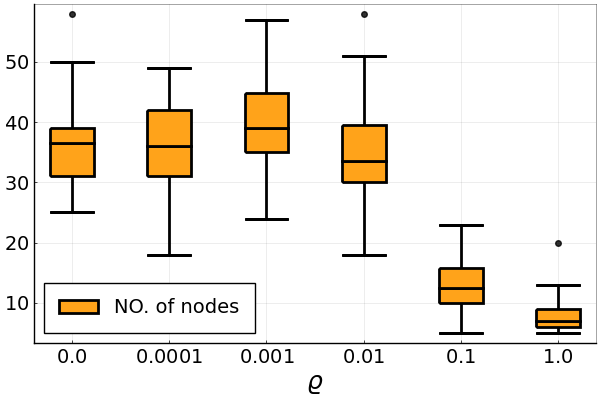

In [7]:
p = plot_time("AAAI", 30, 1000)
# display(p)    

In [5]:
savefig(p, "num_nodes_srvi_test.pdf")

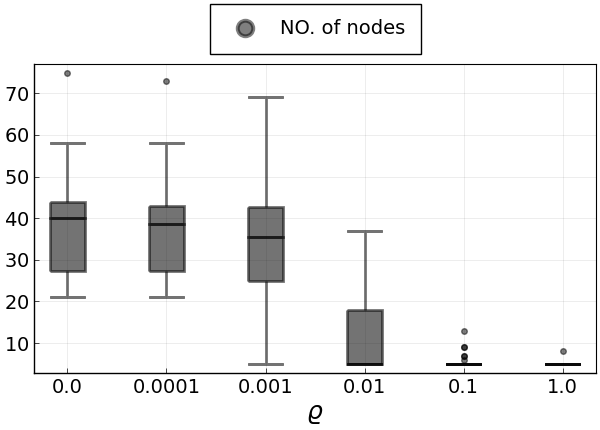

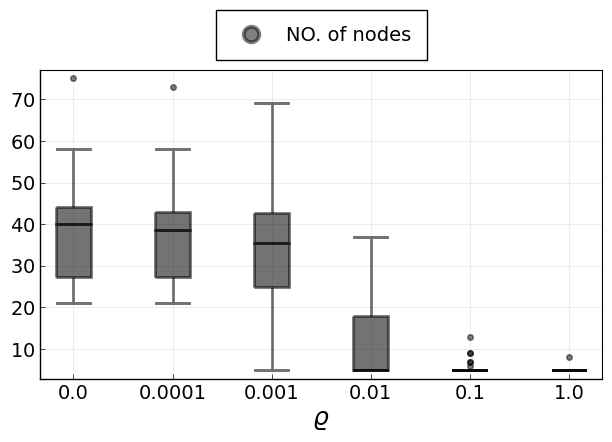

In [74]:
p = plot_time("AAAI", 30, 1000)
# display(p)

In [75]:
savefig(p, "num_nodes_rvi.pdf")

Any["0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.0001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0.001", "0

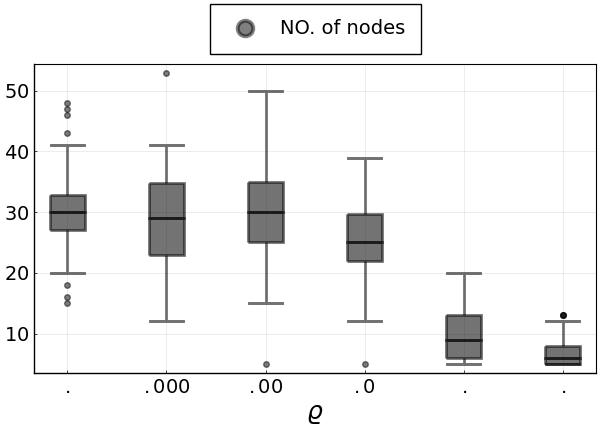

In [20]:
p = plot_time("fmnist", 50, 1000)
